In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

## Test if data are right

# Signal

In [ ]:
datos = pd.read_csv('/content/drive/Shareddrives/Lab3/Modelos_IA/SignalMC.csv')
datos

,Pt1,eta1,phi1,charge1,Pt2,eta2,phi2,charge2
0,33.927319,-2.310444,-1.069432,1,31.234623,-0.907183,2.209268,-1
1,48.815548,-1.808052,2.083955,-1,40.737465,-1.513442,-0.728953,1
2,43.563423,2.204432,-1.032816,-1,37.837551,1.089785,2.114287,1
3,61.442635,-0.331965,-2.885339,-1,60.341976,-1.077894,0.231437,1
4,46.626228,0.979511,1.954236,1,35.068932,-0.085838,-0.874276,-1
...,...,...,...,...,...,...,...,...
62594,52.035816,2.157876,2.858251,1,51.233162,0.906563,-0.310663,-1
62595,48.084599,-0.299988,-0.479042,1,38.632908,-0.746271,2.821133,-1
62596,44.239361,-0.974683,0.574220,1,42.898392,-0.128658,-2.623725,-1
62597,48.021828,-0.300744,-2.150110,-1,43.171089,0.015504,0.924821,1


In [ ]:
datos.shape

(62599, 8)

In [ ]:
datos = datos[(abs(datos['Pt1'] > 20)) & (abs(datos['Pt2']> 20))]
datos = datos[(abs(datos['eta1']) < 2.4) & (abs(datos['eta2']) < 2.4)]
datos = datos[(abs(datos['eta1']) < 1.4) | (abs(datos['eta1']) > 1.57)]
datos = datos[(abs(datos['eta2']) < 1.4) | (abs(datos['eta2']) > 1.57)]

In [ ]:
#Construyendo Theta
datos['theta'] = abs(np.arctan(1/np.sinh(datos['eta1'])))+abs(np.arctan(1/np.sinh(datos['eta2'])))

In [ ]:
#Construyendo |P|
datos['p1'] = datos['Pt1']*np.cosh(datos['eta1'])
datos['p2'] = datos['Pt2']*np.cosh(datos['eta2'])

In [ ]:
#Constantes
me= 0.000510998928

In [ ]:
#Construyendo E
datos['E1'] = np.sqrt(datos['p1']**2+me**2)
datos['E2'] = np.sqrt(datos['p2']**2+me**2)

In [ ]:
#Construyendo M
datos['M'] = np.sqrt(2*me**2 + 2*(datos['E1']*datos['E2']-datos['p1']*datos['p2']*np.cos(datos['theta'])))

In [ ]:
datos = datos[(abs(datos['M'] >= 80)) & (abs(datos['M'] <= 100))]
datos.shape

(36073, 14)

Text(0.5, 0, 'Masa del Z-> e e')

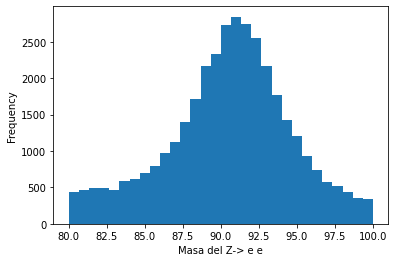

In [ ]:
datos['M'].plot(kind='hist', bins=30)
plt.xlabel('Masa del Z-> e e')

# Background

In [ ]:
datos = pd.read_csv('/content/drive/Shareddrives/Lab3/Modelos_IA/BackgroundMC.csv')
datos.head()

,Pt1,eta1,phi1,charge1,Pt2,eta2,phi2,charge2
0,10.781392,-0.324090,-1.269755,1,10.621332,0.240727,1.691828,-1
1,22.049517,-0.794464,-1.289868,1,15.643308,0.199250,1.821956,-1
2,19.190317,0.374757,-2.665678,1,10.974093,1.122649,1.073409,-1
3,18.245489,-0.675601,-2.639393,1,15.988032,-1.118686,0.133777,-1
4,25.883762,-1.347070,-2.260378,-1,25.871340,1.389303,0.948341,1


In [ ]:
datos.shape

(37441, 8)

In [ ]:
datos = datos[(abs(datos['Pt1'] > 20)) & (abs(datos['Pt2']> 20))]
datos = datos[(abs(datos['eta1']) < 2.4) & (abs(datos['eta2']) < 2.4)]
datos = datos[(abs(datos['eta1']) < 1.4) | (abs(datos['eta1']) > 1.57)]
datos = datos[(abs(datos['eta2']) < 1.4) | (abs(datos['eta2']) > 1.57)]

In [ ]:
#Construyendo Theta
datos['theta'] = abs(np.arctan(1/np.sinh(datos['eta1'])))+abs(np.arctan(1/np.sinh(datos['eta2'])))

In [ ]:
#Construyendo |P|
datos['p1'] = datos['Pt1']*np.cosh(datos['eta1'])
datos['p2'] = datos['Pt2']*np.cosh(datos['eta2'])

In [ ]:
#Constantes
me= 0.000510998928

In [ ]:
#Construyendo E
datos['E1'] = np.sqrt(datos['p1']**2+me**2)
datos['E2'] = np.sqrt(datos['p2']**2+me**2)

In [ ]:
#Construyendo M
datos['M'] = np.sqrt(2*me**2 + 2*(datos['E1']*datos['E2']-datos['p1']*datos['p2']*np.cos(datos['theta'])))

In [ ]:
datos = datos[(abs(datos['M'] >= 80)) & (abs(datos['M'] <= 100))]
datos.shape

(973, 14)

Text(0.5, 0, 'Masa del Z-> e e')

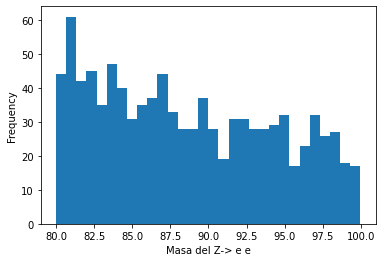

In [ ]:
datos['M'].plot(kind='hist', bins=30)
plt.xlabel('Masa del Z-> e e')

------------

## Building Machine Learning models

In [ ]:
#Libraries to use

from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [ ]:
datos_s = pd.read_csv('/content/drive/Shareddrives/Lab3/Modelos_IA/SignalMC.csv')
datos_s = datos_s.sample(frac=1,random_state=5).reset_index(drop=True)
datos_s = datos_s[:37441]
#datos['theta'] = abs(np.arctan(1/np.sinh(datos['eta1'])))+abs(np.arctan(1/np.sinh(datos['eta2'])))
#Construyendo |P|
#datos['p1'] = datos['Pt1']*np.cosh(datos['eta1'])
#datos['p2'] = datos['Pt2']*np.cosh(datos['eta2'])
#Constantes
#me= 0.000510998928
#Construyendo E
#datos['E1'] = np.sqrt(datos['p1']**2+me**2)
#datos['E2'] = np.sqrt(datos['p2']**2+me**2)
#Construyendo M
#datos['M'] = np.sqrt(2*me**2 + 2*(datos['E1']*datos['E2']-datos['p1']*datos['p2']*np.cos(datos['theta'])))
#datos = datos[(abs(datos['M'] >= 80)) & (abs(datos['M'] <= 100))]
#datos_s  = datos.drop(['theta','p1','p2','E1','E2','M'],axis=1)
datos_bg = pd.read_csv('/content/drive/Shareddrives/Lab3/Modelos_IA/BackgroundMC.csv')

In [ ]:
datos_s.shape, datos_bg.shape

((37441, 8), (37441, 8))

In [ ]:
# Checking for missing values
print(datos_s.isnull().sum(), " \n\n", datos_bg.isnull().sum())

Pt1        0
eta1       0
phi1       0
charge1    0
Pt2        0
eta2       0
phi2       0
charge2    0
dtype: int64  

 Pt1        0
eta1       0
phi1       0
charge1    0
Pt2        0
eta2       0
phi2       0
charge2    0
dtype: int64


No missing values

etiquetar los datos, luego concatenar los datos y luego dropear la columna de etiquetas y almancenarla en y, luego dividir los datos en test y train

In [ ]:
datos_s['label'] = 1
datos_bg['label'] = 0

In [ ]:
datos_s.head()

,Pt1,eta1,phi1,charge1,Pt2,eta2,phi2,charge2,label
0,43.285572,-0.299780,3.095890,1,40.961838,0.589661,0.455137,-1,1
1,30.009159,2.003994,2.836176,-1,23.065567,-0.487782,-0.506659,1,1
2,48.327274,-0.238477,-2.251606,1,41.573593,0.289230,0.610729,-1,1
3,48.045456,0.267865,-2.040003,-1,40.741467,0.686348,1.132613,1,1
4,51.036621,-1.920737,1.219882,-1,40.159821,-2.320866,-1.837624,1,1


In [ ]:
datos_bg.head()

,Pt1,eta1,phi1,charge1,Pt2,eta2,phi2,charge2,label
0,10.781392,-0.324090,-1.269755,1,10.621332,0.240727,1.691828,-1,0
1,22.049517,-0.794464,-1.289868,1,15.643308,0.199250,1.821956,-1,0
2,19.190317,0.374757,-2.665678,1,10.974093,1.122649,1.073409,-1,0
3,18.245489,-0.675601,-2.639393,1,15.988032,-1.118686,0.133777,-1,0
4,25.883762,-1.347070,-2.260378,-1,25.871340,1.389303,0.948341,1,0


In [ ]:
#Concatenate the data and shuffle rows
data = pd.concat([datos_s, datos_bg], axis=0)
data = data.sample(frac=1).reset_index(drop=True)
data

,Pt1,eta1,phi1,charge1,Pt2,eta2,phi2,charge2,label
0,30.138638,-1.594054,-0.690431,1,18.850864,-1.136452,-1.896318,-1,0
1,16.887140,0.676469,-0.717030,1,14.911680,1.028976,2.245122,-1,0
2,14.911141,-0.268265,-1.717111,1,10.990586,-0.216750,0.896378,-1,0
3,91.107758,1.764042,-3.133567,-1,33.486385,1.055551,-0.182731,1,1
4,28.883240,-2.198392,2.092580,1,26.958075,-1.474644,-0.933464,-1,0
...,...,...,...,...,...,...,...,...,...
74877,40.335720,0.003902,0.021393,1,31.276991,-1.197745,0.711064,-1,0
74878,11.697860,0.759040,-1.444144,-1,11.163225,2.071302,2.099202,1,0
74879,29.991524,-0.660720,-0.377440,-1,24.207617,-1.306651,2.836139,1,0
74880,98.942848,0.891640,2.493796,1,19.962715,1.044780,-0.549596,-1,1


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pt1,74882.0,34.877813,19.391417,10.026400,18.638533,33.885366,46.212729,671.404663
eta1,74882.0,0.004866,1.167379,-2.499226,-0.899363,0.005788,0.906498,2.498420
phi1,74882.0,-0.019297,1.807435,-3.141562,-1.586254,-0.027156,1.541778,3.141547
charge1,74882.0,-0.000454,1.000007,-1.000000,-1.000000,-1.000000,1.000000,1.000000
Pt2,74882.0,26.650932,14.082857,10.000312,14.170147,24.927398,37.514312,664.177856
eta2,74882.0,0.003875,1.196026,-2.499648,-0.918797,0.002046,0.930454,2.499783
phi2,74882.0,0.007350,1.814482,-3.141531,-1.566670,0.018550,1.580317,3.141068
charge2,74882.0,0.000454,1.000007,-1.000000,-1.000000,1.000000,1.000000,1.000000
label,74882.0,0.500000,0.500003,0.000000,0.000000,0.500000,1.000000,1.000000


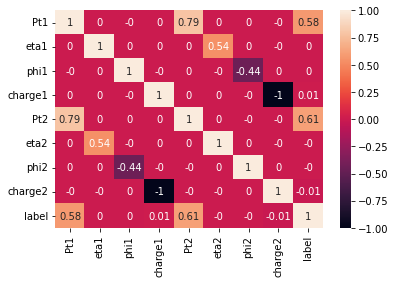

In [ ]:
correlation_matrix = data.corr().round(2)
sns.heatmap(correlation_matrix, annot=True)

In [ ]:
# X y y
X = data.drop(['label','charge1','charge2'],axis=1).values
y = data['label'].values

In [ ]:
X

array([[30.13863754, -1.59405434, -0.69043124, 18.85086441, -1.13645208,
        -1.89631808],
       [16.88714027,  0.67646909, -0.71702975, 14.91168022,  1.02897632,
         2.24512196],
       [14.9111414 , -0.26826492, -1.71711051, 10.99058628, -0.21674956,
         0.89637792],
       ...,
       [29.99152374, -0.66072029, -0.37743977, 24.20761681, -1.30665076,
         2.83613896],
       [98.94284821,  0.89163959,  2.49379611, 19.96271515,  1.04478025,
        -0.54959577],
       [10.94668484, -0.63140726, -1.16725361, 10.07247066,  0.84783089,
         1.92054391]])

In [ ]:
# standardize training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)
X_standard;

In [ ]:
# split data in train and test, before adding the label s or b
#X_train, X_test, labels_train, labels_test = train_test_split(X, y, test_size = 0.3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# decisionTreeModel
from sklearn.tree import DecisionTreeClassifier
Decision_Tree_Model = DecisionTreeClassifier()
Decision_Tree_Model.fit(X_train,y_train)
print('Decision_Tree_Model Train Score is   : ' ,Decision_Tree_Model.score(X_train, y_train))
print('Decision_Tree_Model test Score is   : ' ,Decision_Tree_Model.score(X_test, y_test))
#y_pred is applying the model to the test data
y_pred = Decision_Tree_Model.predict(X_test)
print('Decision_Tree_Model f1 Score is   : ' ,f1_score(y_test, y_pred))

Decision_Tree_Model Train Score is   :  1.0
Decision_Tree_Model test Score is   :  0.8932502427970217
Decision_Tree_Model f1 Score is   :  0.8932934228622279


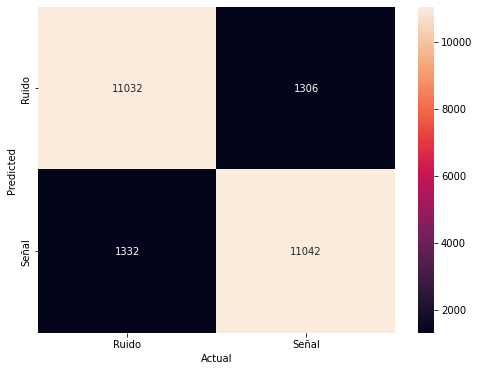

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=["Ruido","Señal"],yticklabels=["Ruido","Señal"])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [ ]:
# linear discriminant analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
Linear_Discriminant_Analysis = LinearDiscriminantAnalysis()
Linear_Discriminant_Analysis.fit(X_train, y_train)
print('Linear_Discriminant_Analysis Train Score is   : ' ,Linear_Discriminant_Analysis.score(X_train, y_train))
print('Linear_Discriminant_Analysis Test Score is   : ' ,Linear_Discriminant_Analysis.score(X_test, y_test))
#y_pred is applying the model to the test data
y_pred = Linear_Discriminant_Analysis.predict(X_test)
print('Linear_Discriminant_Analysis f1 Score is   : ' ,f1_score(y_test, y_pred))

Linear_Discriminant_Analysis Train Score is   :  0.8676699222643014
Linear_Discriminant_Analysis Test Score is   :  0.8683230819035287
Linear_Discriminant_Analysis f1 Score is   :  0.8674433762424638


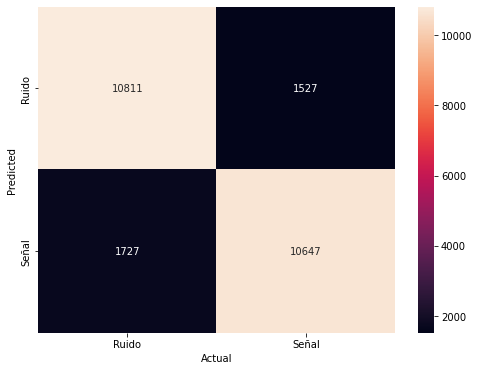

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=["Ruido","Señal"],yticklabels=["Ruido","Señal"])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [ ]:
# quadratic discriminant analysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
Quadratic_Discriminant_Analysis = QuadraticDiscriminantAnalysis()
Quadratic_Discriminant_Analysis.fit(X_train, y_train)
print('Quadratic_Discriminant_Analysis Train Score is   : ' ,Quadratic_Discriminant_Analysis.score(X_train, y_train))
print('Quadratic_Discriminant_Analysis Test Score is   : ' ,Quadratic_Discriminant_Analysis.score(X_test, y_test))
#y_pred is applying the model to the test data
y_pred = Quadratic_Discriminant_Analysis.predict(X_test)
print('Quadratic_Discriminant_Analysis f1 Score is   : ' ,f1_score(y_test, y_pred))

Quadratic_Discriminant_Analysis Train Score is   :  0.8992027107833367
Quadratic_Discriminant_Analysis Test Score is   :  0.899239235998705
Quadratic_Discriminant_Analysis f1 Score is   :  0.9004398240703718


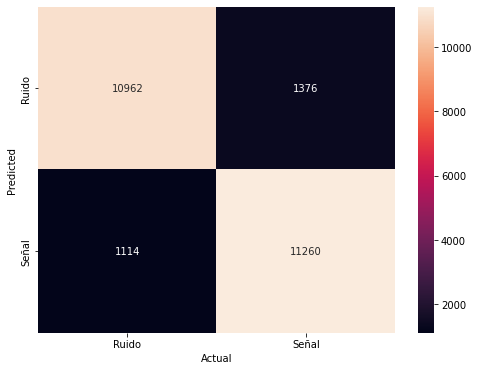

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=["Ruido","Señal"],yticklabels=["Ruido","Señal"])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [ ]:
# Gaussian Naive Bayes Model
from sklearn.naive_bayes import GaussianNB
GaussianNBModel = GaussianNB()
GaussianNBModel.fit(X_train,y_train)
print('GaussianNBModel Train Score is   : ' ,GaussianNBModel.score(X_train, y_train))
print('GaussianNBModel Test Score is   : ' ,GaussianNBModel.score(X_test, y_test))
#y_pred is applying the model to the test data
y_pred = GaussianNBModel.predict(X_test)
print('GaussianNBModel f1 Score is   : ' ,f1_score(y_test, y_pred))

GaussianNBModel Train Score is   :  0.8714371138130357
GaussianNBModel Test Score is   :  0.8709533829718356
GaussianNBModel f1 Score is   :  0.8710107996602353


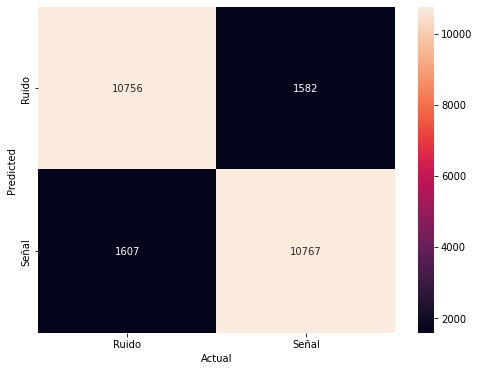

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=["Ruido","Señal"],yticklabels=["Ruido","Señal"])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [ ]:
# BernoulliNBModel
from sklearn.naive_bayes import BernoulliNB
BernoulliNBModel = BernoulliNB()
BernoulliNBModel.fit(X_train, y_train)
print('BernoulliNBModel Train Score is   : ' ,BernoulliNBModel.score(X_train, y_train))
print('BernoulliNBModel Test Score is   : ' ,BernoulliNBModel.score(X_test, y_test))
#y_pred is applying the model to the test data
y_pred = BernoulliNBModel.predict(X_test)
print('BernoulliNBModel f1 Score is   : ' ,f1_score(y_test, y_pred))

BernoulliNBModel Train Score is   :  0.5028104444887382
BernoulliNBModel Test Score is   :  0.5027516995791518
BernoulliNBModel f1 Score is   :  0.4996335206450037


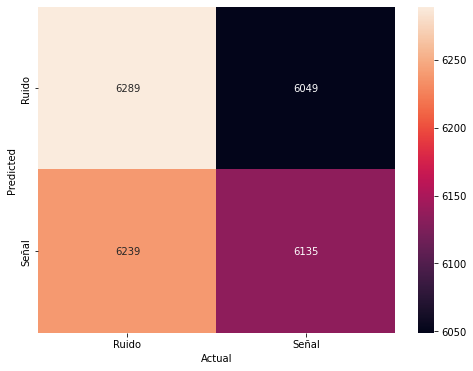

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=["Ruido","Señal"],yticklabels=["Ruido","Señal"])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [ ]:
# logistic regression
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
print('logistic_regression Train Score is   : ' ,logistic_regression.score(X_train, y_train))
print('logistic_regression Test Score is   : ' ,logistic_regression.score(X_test, y_test))
#y_pred is applying the model to the test data
y_pred = logistic_regression.predict(X_test)
print('logistic_regression f1 Score is   : ' ,f1_score(y_test, y_pred))

logistic_regression Train Score is   :  0.8697628064580426
logistic_regression Test Score is   :  0.8705891874393007
logistic_regression f1 Score is   :  0.8711003627569529


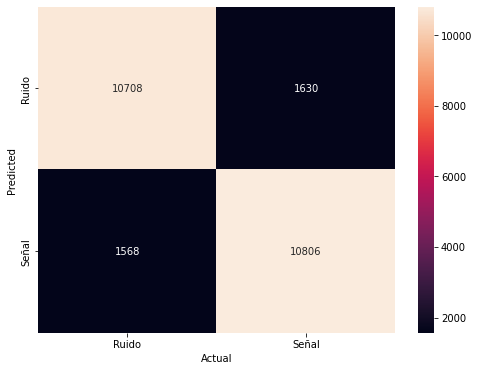

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=["Ruido","Señal"],yticklabels=["Ruido","Señal"])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

**Estos modelos anteriores son para la posterior validación de los datos "datos.csv", que son los importantes ya que son los obtenidos en el experimento**

------------

### Creation of a Neural Network

In [ ]:
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-ywvpdkbg
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-ywvpdkbg


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from tensorflow.keras.utils import to_categorical


import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

2.6.0


In [ ]:
data = data.drop(['charge1','charge2'], axis=1)
data

,Pt1,eta1,phi1,Pt2,eta2,phi2,label
0,30.138638,-1.594054,-0.690431,18.850864,-1.136452,-1.896318,0
1,16.887140,0.676469,-0.717030,14.911680,1.028976,2.245122,0
2,14.911141,-0.268265,-1.717111,10.990586,-0.216750,0.896378,0
3,91.107758,1.764042,-3.133567,33.486385,1.055551,-0.182731,1
4,28.883240,-2.198392,2.092580,26.958075,-1.474644,-0.933464,0
...,...,...,...,...,...,...,...
74877,40.335720,0.003902,0.021393,31.276991,-1.197745,0.711064,0
74878,11.697860,0.759040,-1.444144,11.163225,2.071302,2.099202,0
74879,29.991524,-0.660720,-0.377440,24.207617,-1.306651,2.836139,0
74880,98.942848,0.891640,2.493796,19.962715,1.044780,-0.549596,1


In [ ]:
# 70% datos de entrenamiento y 30% datos de testeo
train_data = data.sample(frac=0.7,random_state=0)
test_data = data.drop(train_data.index)

In [ ]:
# Separando las características de las etiquetas
# para nuestro caso queremos que la etiqueta sea TOTAL
train_labels = train_data.pop('label')
test_labels = test_data.pop('label')

In [ ]:
train_data

,Pt1,eta1,phi1,Pt2,eta2,phi2
15534,20.664110,2.059297,2.612485,16.847134,2.045461,-0.611175
43684,19.025078,1.684687,-0.794007,16.106850,1.117441,2.542058
70785,45.413982,-0.087621,2.801003,44.457729,-0.402470,-0.327225
14739,43.256905,1.410299,2.898808,39.434795,0.215566,-0.263473
30878,34.088799,0.637092,1.197476,32.485142,-0.073639,-1.985421
...,...,...,...,...,...,...
39131,14.635487,1.438556,2.737312,11.974532,2.004267,-0.469979
21160,31.258055,1.019179,1.109429,10.222368,1.694172,3.127886
2578,44.608650,1.997407,-0.627483,37.693302,0.955562,2.606716
68988,56.865791,-1.489857,-2.424183,45.649281,0.011714,0.605794


In [ ]:
X = train_data.values
y = train_labels.values
X_test = test_data.values
y_test = test_labels.values

In [ ]:
"""# baseline model
def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(32, activation='relu', input_shape=[len(X.keys())]))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model"""

"# baseline model\ndef create_baseline():\n    # create model\n    model = Sequential()\n    model.add(Dense(32, activation='relu', input_shape=[len(X.keys())]))\n    model.add(Dense(1, activation='sigmoid'))\n    # Compile model\n    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])\n    return model"

In [ ]:
"""len(train_data.keys())"""

'len(train_data.keys())'

In [ ]:
"""estimator = KerasClassifier(build_fn=create_baseline, epochs=30, batch_size=1000, verbose=0)
kfold = StratifiedKFold(n_splits=100, shuffle=True)
results = cross_val_score(estimator, X, y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))"""

'estimator = KerasClassifier(build_fn=create_baseline, epochs=30, batch_size=1000, verbose=0)\nkfold = StratifiedKFold(n_splits=100, shuffle=True)\nresults = cross_val_score(estimator, X, y, cv=kfold)\nprint("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))'

the above output show the mean and standard deviation of the estimated accuracy of the model on unseen data.

In [ ]:
"""
# evaluate baseline model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs=30, batch_size=1000, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=100, shuffle=True)
results = cross_val_score(pipeline, X, y, cv=kfold)
print("Standardized: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))"""

'\n# evaluate baseline model with standardized dataset\nestimators = []\nestimators.append((\'standardize\', StandardScaler()))\nestimators.append((\'mlp\', KerasClassifier(build_fn=create_baseline, epochs=30, batch_size=1000, verbose=0)))\npipeline = Pipeline(estimators)\nkfold = StratifiedKFold(n_splits=100, shuffle=True)\nresults = cross_val_score(pipeline, X, y, cv=kfold)\nprint("Standardized: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))'

the above output show the mean and standard deviation of the estimated accuracy of the model with standarized data on unseen data.

------------

Build a sequential model with 32 (we can change) neurons on the first layer and an output layer with 1 neuron and sigmoid activation function.

Also we use loss function as binary cross entropy and accuracy metric

In [ ]:
# build model
def build_model():
    # create model
    model = Sequential()
    model.add(Dense(32, activation='relu', input_shape=[len(train_data.keys())]))
    model.add(Dense(2, activation='softmax'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

model = build_model()        
EPOCHS = 500
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                224       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 66        
Total params: 290
Trainable params: 290
Non-trainable params: 0
_________________________________________________________________


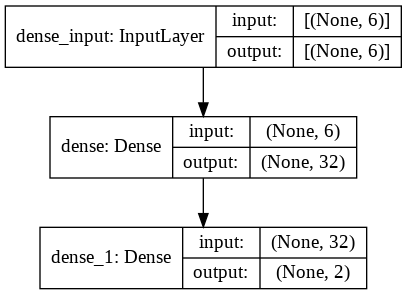

In [ ]:
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

In [ ]:
#one-hot encoding
train_labels_enc = to_categorical(train_labels.values,num_classes=2,dtype="int32")
test_labels_enc = to_categorical(test_labels.values,num_classes=2,dtype="int32")

In [ ]:
# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(train_data, train_labels_enc, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])


....................................

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
31,0.213356,0.933084,0.209133,0.940004,31
32,0.213942,0.934348,0.205019,0.934185,32
33,0.212307,0.934205,0.205585,0.934090,33
34,0.212811,0.933847,0.204885,0.939336,34
35,0.212532,0.933966,0.205675,0.939908,35


In [ ]:
loss, acc  = model.evaluate(X_test,test_labels_enc)

703/703 [==============================] - 1s 2ms/step - loss: 0.2071 - accuracy: 0.9387


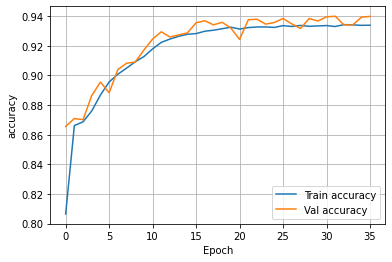

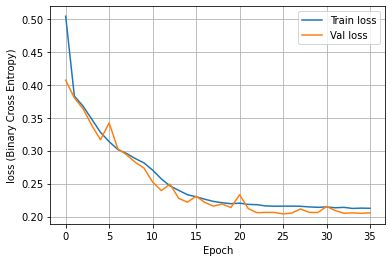

In [ ]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'],
           label='Train accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'],
           label = 'Val accuracy')
    #plt.ylim([0,5])
    plt.grid()
    plt.legend()
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('loss (Binary Cross Entropy)')
    plt.plot(hist['epoch'], hist['loss'],
           label='Train loss')
    plt.plot(hist['epoch'], hist['val_loss'],
           label = 'Val loss')
    #plt.ylim([0,5])
    plt.grid()
    plt.legend()
    
    
plot_history(history)

The binary cross entropy loss goes to zero fast enough so the model only takes $\approx 40$ epochs to get the early stop

In [ ]:
#hist = pd.DataFrame(history.history)
#hist

In [ ]:
y_pred=np.argmax(model.predict(X_test),axis=1)

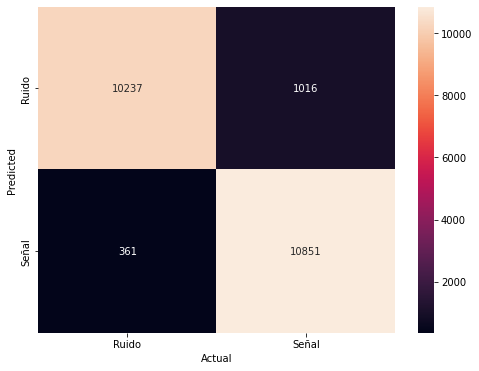

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=["Ruido","Señal"],yticklabels=["Ruido","Señal"])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

-------------------

Now we are going to apply the models to the real data, the data obtained in the CMS Experiment, to classify in signal and background and then construct the invariant mass and compare results

In [ ]:
data_cms = pd.read_csv('/content/drive/Shareddrives/Lab3/Modelos_IA/datos.csv', sep='|')
data_cms = data_cms.drop(['charge1','charge2'],axis=1) # Drop the colums charge1 and charge2
X_cms = data_cms
X_cms.shape

(57658, 6)

In [ ]:
def masa_inv(datos):

    """datos = datos[(abs(datos['Pt1'] > 20)) & (abs(datos['Pt2']> 20))]
    datos = datos[(abs(datos['eta1']) < 2.4) & (abs(datos['eta2']) < 2.4)]
    datos = datos[(abs(datos['eta1']) < 1.4) | (abs(datos['eta1']) > 1.57)]
    datos = datos[(abs(datos['eta2']) < 1.4) | (abs(datos['eta2']) > 1.57)]"""

    #Construyendo Theta
    datos['theta'] = abs(np.arctan(1/np.sinh(datos['eta1'])))+abs(np.arctan(1/np.sinh(datos['eta2'])))

    #Construyendo |P|
    datos['p1'] = datos['Pt1']*np.cosh(datos['eta1'])
    datos['p2'] = datos['Pt2']*np.cosh(datos['eta2'])

    #Constantes
    me= 0.000510998928

    #Construyendo E
    datos['E1'] = np.sqrt(datos['p1']**2+me**2)
    datos['E2'] = np.sqrt(datos['p2']**2+me**2)


    #Construyendo M
    datos['M'] = np.sqrt(2*me**2 + 2*(datos['E1']*datos['E2']-datos['p1']*datos['p2']*np.cos(datos['theta'])))

    datos = datos[(abs(datos['M'] >= 80)) & (abs(datos['M'] <= 100))]
    
    return datos

In [ ]:
# Using Decision Tree model
y_pred1 = Decision_Tree_Model.predict(X_cms)

In [ ]:
data_cms['label'] = y_pred1

In [ ]:
%cd "/content/drive/Shareddrives/Lab3/Modelos_IA"

/content/drive/Shareddrives/Lab3/Modelos_IA


In [ ]:
# Adding the label predicted to the data of CMS
data_cms['label'] = y_pred1
data_clasi_1 = data_cms[data_cms['label']==1] #Droping out background data

#Save data as CSV
decision_tree = data_clasi_1.drop(['label'],axis=1)
decision_tree.to_csv("decision_tree.csv",header=True, index=False)


# droping label column again to repeat with the others models
data_cms = data_cms.drop(['label'],axis=1)
data_clasi_1.shape

(48456, 7)

**A hacer:** Tomar diferentes datos de entrenamiento y testeo (random state)




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

(35647, 13)

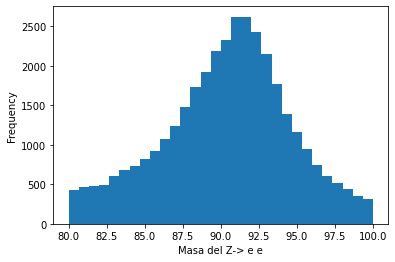

In [ ]:
data_clasi_1 = masa_inv(data_clasi_1)
data_clasi_1['M'].plot(kind='hist', bins=30)
plt.xlabel('Masa del Z-> e e')
data_clasi_1.shape

In [ ]:
X_cms = X_cms.drop('label', axis = 1) 

In [ ]:
y_pred2 = Linear_Discriminant_Analysis.predict(X_cms)

In [ ]:
# Adding the label predicted to the data of CMS
data_cms['label'] = y_pred2
data_clasi_2 = data_cms[data_cms['label']==1] #Droping out background data

#Save data as CSV
linear_discriminant = data_clasi_2.drop(['label'],axis=1)
linear_discriminant.to_csv("linear_discriminant.csv",header=True, index=False)


# droping label column again to repeat with the others models
data_cms = data_cms.drop(['label'],axis=1)
data_clasi_2.shape

(48281, 7)

(37098, 13)

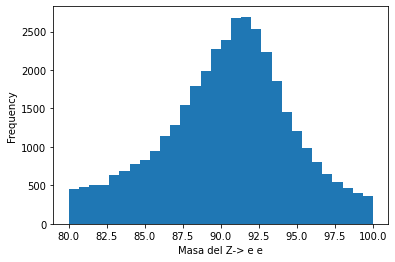

In [ ]:
data_clasi_2 = masa_inv(data_clasi_2)
data_clasi_2['M'].plot(kind='hist', bins=30)
plt.xlabel('Masa del Z-> e e')
data_clasi_2.shape

In [ ]:
y_pred3 = Quadratic_Discriminant_Analysis.predict(X_cms)

In [ ]:
# Adding the label predicted to the data of CMS
data_cms['label'] = y_pred3
data_clasi_3 = data_cms[data_cms['label']==1] #Droping out background data

#Save data as CSV
quadratic_discriminant = data_clasi_3.drop(['label'],axis=1)
quadratic_discriminant.to_csv("quadratic_discriminant.csv",header=True, index=False)


# droping label column again to repeat with the others models
data_cms = data_cms.drop(['label'],axis=1)
data_clasi_3.shape

(50558, 7)

(37861, 13)

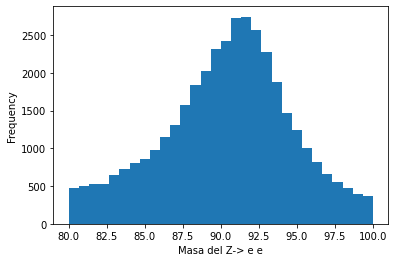

In [ ]:
data_clasi_3 = masa_inv(data_clasi_3)
data_clasi_3['M'].plot(kind='hist', bins=30)
plt.xlabel('Masa del Z-> e e')
data_clasi_3.shape

In [ ]:
y_pred4=np.argmax(model.predict(X_cms),axis=1)

In [ ]:
data_cms['label'] = y_pred4
data_clasi_4 = data_cms[data_cms['label']==1] #Droping out background data

#Save data as CSV
nn_model = data_clasi_4.drop(['label'],axis=1)
nn_model.to_csv("nn_model.csv",header=True, index=False)

# droping label column again to repeat with the others models
data_cms = data_cms.drop(['label'],axis=1)
data_clasi_4.shape

(52368, 7)

(38224, 13)

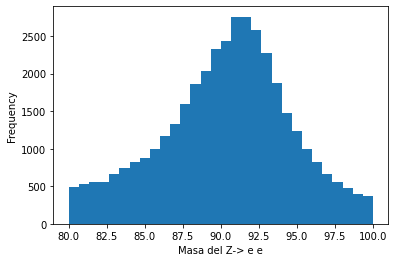

In [ ]:
data_clasi_4 = masa_inv(data_clasi_4)
data_clasi_4['M'].plot(kind='hist', bins=30)
plt.xlabel('Masa del Z-> e e')
data_clasi_4.shape